In [24]:

pip install tensorflow==2.13.1


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import tensorflow as tf
print(tf.__version__)

2024-11-25 18:24:28.784044: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 18:24:29.653479: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 18:24:30.372511: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-25 18:24:30.381857: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 18:25:34.008473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.1


Extracting the data from data set

In [3]:
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype=('i8','U6','f8'))

day = []
time = []
height = []

for i in range(len(data)):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print(time)
print(height)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22'

Combining time and day to create timeline

In [4]:
timehour = []
timemin = []
timehourdec = []
timemindec = []
timepercent = []
x = []
for i in range(len(time)):
    splittime = time[i].split(':')
    timehour.append(splittime[0])
    timehourdec.append(float(splittime[0])/24)
    timemin.append(splittime[1])
    timemindec.append(float(splittime[1])/1440)
    timepercent.append(timehourdec[i]+timemindec[i])
    x.append(timepercent[i]+day[i])
    
#print(timehour)
#print(timehourdec)
#print(timemin)
#print(timemindec)
#print(timepercent)
print(x)



[1.3381944444444445, 1.6506944444444445, 2.3715277777777777, 2.6840277777777777, 3.40625, 3.7180555555555554, 4.440972222222222, 4.75, 5.477777777777778, 5.781944444444444, 6.5152777777777775, 6.813194444444444, 7.558333333333334, 7.844444444444444, 8.140277777777778, 8.875694444444445, 9.171527777777778, 9.906944444444445, 10.20138888888889, 10.498611111111112, 11.229861111111111, 11.53888888888889, 12.255555555555556, 12.572916666666666, 13.282638888888888, 13.600694444444445, 14.306944444444444, 14.625, 15.332638888888889, 15.64861111111111, 16.356944444444444, 16.67222222222222, 17.381944444444443, 17.695138888888888, 18.40625, 18.716666666666665, 19.43125, 19.739583333333332, 20.45625, 20.760416666666668, 21.48472222222222, 21.783333333333335, 22.51736111111111, 22.805555555555557, 23.09861111111111, 23.82777777777778, 24.12361111111111, 24.854166666666668, 25.150694444444444, 25.447222222222223, 26.18263888888889, 26.49652777777778, 27.21875, 27.539583333333333, 28.25625, 28.5763

Text(0, 0.5, 'Tide Height (ft.)')

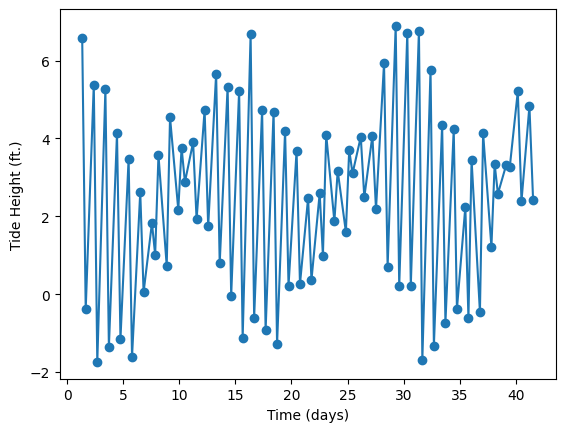

In [5]:
plt.plot(x,height, '-o')
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (ft.)')

In [89]:
A_init = 2.9145562648773193
A_fit = tf.Variable(A_init)
B_init = 0.45006895065307617
B_fit = tf.Variable(B_init)
C_init = 0.2865771949291229
C_fit = tf.Variable(C_init)
D_init = 1.1557908058166504
D_fit = tf.Variable(D_init)
E_init = 30.130300521850586
E_fit = tf.Variable(E_init)
F_init = -1.0028715133666992
F_fit = tf.Variable(F_init)
G_init = 2.4069228172302246
G_fit = tf.Variable(G_init)

In [83]:
@tf.function
def model(x):
    return (A_fit * tf.math.sin(B_fit * x + C_fit) + D_fit) * tf.math.sin(E_fit * x + F_fit) + G_fit

In [84]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [85]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [86]:
epochs = 30000 #number of epochs to run
display_step = 1000 #number of epochs between printing info to screen

for epoch in range(epochs):
    #monitor training/display steps
    if((epoch%display_step)==0):
        pred = model(x)
        loss = mse(pred, height)

        #To print this info, we need to convert to numpy arrays
        print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()}, B: {B_fit.numpy()}, C: {C_fit.numpy()}, D: {D_fit.numpy()}, E: {E_fit.numpy()}, F: {F_fit.numpy()}, G: {G_fit.numpy()}")

    #In TF2, gradients are handled using the GradientTape class. Begin GradientTape and optimize
    with tf.GradientTape() as g:
        pred = model(x)
        loss = mse(height,pred)

    #Compute dm, db, the gradients with respect to m_fit and b_fit
    gradients = g.gradient(loss, [A_fit,B_fit,C_fit,D_fit,E_fit,F_fit,G_fit])

    #update m_fit and b_fit with the gradients x learning
    optimizer.apply_gradients(zip(gradients,[A_fit,B_fit,C_fit,D_fit,E_fit,F_fit,G_fit]))

print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()}, B: {B_fit.numpy()}, C: {C_fit.numpy()}, D: {D_fit.numpy()}, E: {E_fit.numpy()}, F: {F_fit.numpy()}, G: {G_fit.numpy()}")
print("Done!")

Epoch 0 | Loss 8.642059558039705, A: 1.5, B: 0.5, C: 0.30000001192092896, D: 2.200000047683716, E: 25.0, F: 1.0, G: 2.299999952316284
Epoch 1000 | Loss 5.7221057713484855, A: 0.9287899136543274, B: 0.5822117328643799, C: 0.6056296229362488, D: 1.384432315826416, E: 25.074068069458008, F: 0.18956483900547028, G: 2.561495542526245
Epoch 2000 | Loss 5.383310751266074, A: 0.7850492596626282, B: 0.5902059674263, C: 0.27633869647979736, D: 0.8649383783340454, E: 25.085359573364258, F: -0.1786520779132843, G: 2.530623197555542
Epoch 3000 | Loss 5.341053465593166, A: 0.7770845293998718, B: 0.5958597660064697, C: 0.08380123227834702, D: 0.6361976861953735, E: 25.089765548706055, F: -0.3024386167526245, G: 2.5201351642608643


KeyboardInterrupt: 

In [87]:
def model_fit(x, a, b, c, d, e, f, g):
    return (a * np.sin(b*np.array(x) + c) + d) * np.sin(e*np.array(x) + f) + g
#def model_fit(x, a, b, c, d):
    #return a*np.sin(b*np.array(x) + c) + d

y_fit = model_fit(x,A_fit,B_fit,C_fit,D_fit,E_fit,F_fit,G_fit)
#y_fit = model_fit(x, 1.5, 0.5, 0.3, 2.2, 25.0, 1.0, 2.5)
#y_fit = model_fit(x, -1.8, 0.41, 0.6, 3.3, 30.0, 1.5, 0.3)

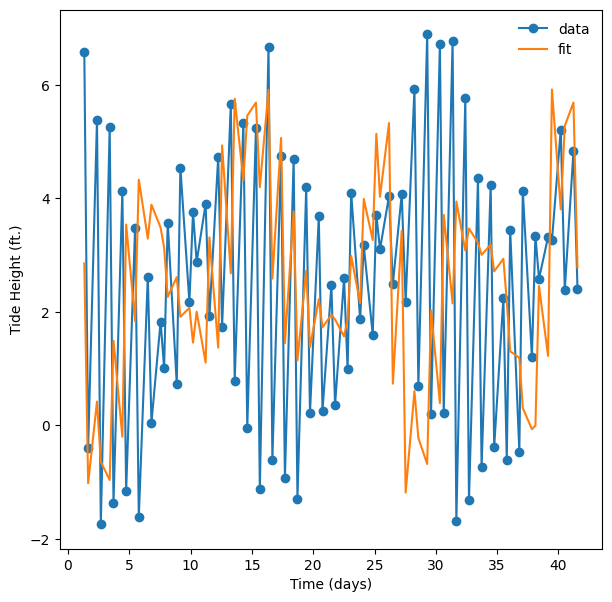

In [88]:
f = plt.figure(figsize=(7,7))
plt.plot(x,height,'-o',label="data")
plt.plot(x,y_fit,label="fit")
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (ft.)')
plt.legend(loc=0,frameon=False)